In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

## Reding the csv file 
baseball = pd.read_csv('Dataset_6_1.csv')
baseball.head()

,Team,Year,Runs,T,HR,SB,OPS
0,Texas Rangers,2011,855,32,210,143,0.800
1,Boston Red Sox,2011,875,35,203,102,0.810
2,Detroit Tigers,2011,787,34,169,49,0.773
3,Kansas City Royals,2011,730,41,129,153,0.744
4,St. Louis Cardinals,2011,762,22,162,57,0.766


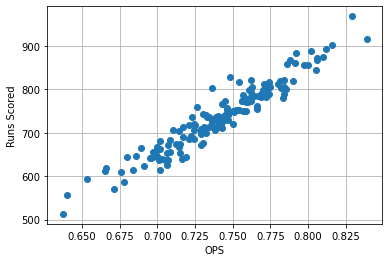

In [2]:
## Plotting runs vs ops
plt.plot('OPS', 'Runs', 'o', data = baseball)
plt.xlabel('OPS')
plt.ylabel('Runs Scored')
plt.grid()
# plt.savefig('chapter6_plot1.pdf')
plt.show()

# Linear Regression

In [3]:
## Fitting the linear model
lm_md = smf.ols(formula = 'Runs ~ OPS', data = baseball).fit()

## Extracting model results
lm_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Runs   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1641.
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           5.49e-82
Time:                        15:36:35   Log-Likelihood:                -681.48
No. Observations:                 150   AIC:                             1367.
Df Residuals:                     148   BIC:                             1373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -764.6958     37.099    -20.612      0.000    -838.008    -691.384
OPS         2025.8635     50.009     40.510      0.000    1927.040    2124.687
==============================================================================
Omnibus:                       12.632   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.824
Skew:                           0.615   Prob(JB):                     0.000996
Kurtosis:                       3.836   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Polynomial Regression

In [4]:
## Reading the csv file 
ken = pd.read_csv('Dataset_6_4.csv')
ken.head()

,Year,HR,T
0,1989,3.516484,1
1,1990,3.685092,2
2,1991,4.014599,3
3,1992,4.778761,4
4,1993,7.731959,5


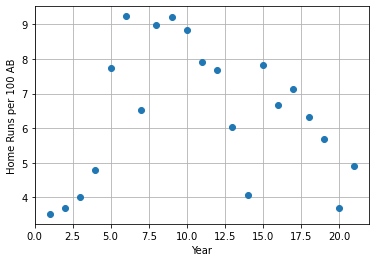

In [5]:
## Visualizing Ken Griffer Jr home run data
plt.plot('T', 'HR', 'o', data = ken)
plt.xlabel('Year')
plt.ylabel('Home Runs per 100 AB')
plt.grid()
# plt.savefig('chapter6_plot2.pdf')
plt.show()

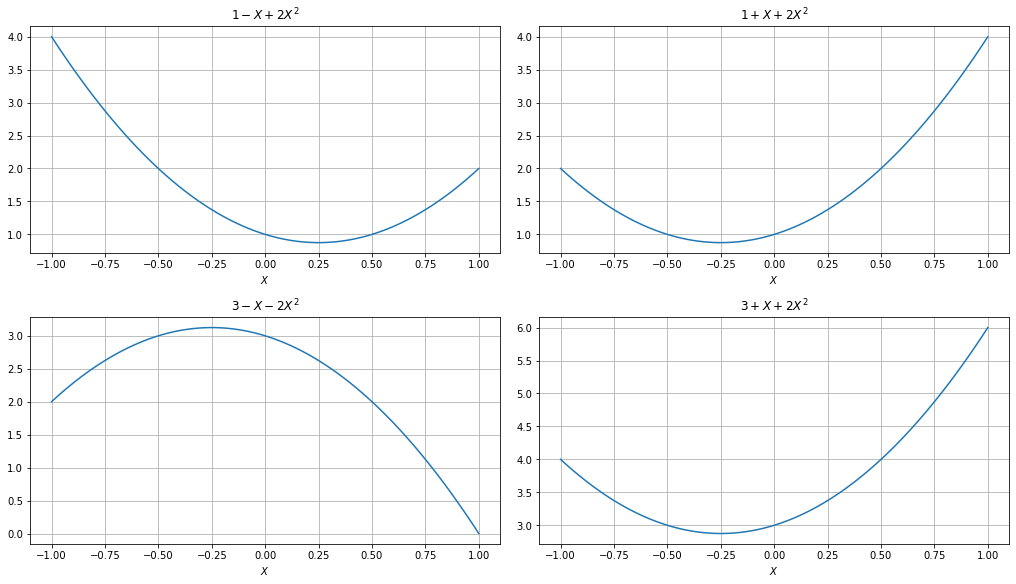

In [6]:
x = np.linspace(-1, 1, num = 100)
y1 = 1 - x + 2*x**2
y2 = 1 + x + 2*x**2
y3 = 3 - x - 2*x**2
y4 = 3 + x + 2*x**2

## Creating a new figure
fig, axes = plt.subplots(2, 2, figsize = (14, 8), constrained_layout=True)

## Plotting the first parabola
axes[0, 0].plot(x, y1)
axes[0, 0].set_xlabel(r'$X$')
axes[0, 0].set_title(r'$1 - X + 2X^2$')
axes[0, 0].grid()

## Plotting the second parabola
axes[0, 1].plot(x, y2)
axes[0, 1].set_xlabel(r'$X$')
axes[0, 1].set_title(r'$1 + X + 2X^2$')
axes[0, 1].grid()

## Plotting the third parabola
axes[1, 0].plot(x, y3)
axes[1, 0].set_xlabel(r'$X$')
axes[1, 0].set_title(r'$3 - X - 2X^2$')
axes[1, 0].grid()

## Plotting the fourth parabola
axes[1, 1].plot(x, y4)
axes[1, 1].set_xlabel(r'$X$')
axes[1, 1].set_title(r'$3 + X + 2X^2$')
axes[1, 1].grid()

# plt.savefig('chapter6_plot3.pdf')

In [7]:
## Fitting quadratic model to Ken's home runs data
quadratic_md = smf.ols(formula = 'HR ~ T + I(T**2)', data = ken).fit()

## Extracting model results
quadratic_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     10.85
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           0.000810
Time:                        15:36:37   Log-Likelihood:                -35.116
No. Observations:                  21   AIC:                             76.23
Df Residuals:                      18   BIC:                             79.36
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6935      1.005      2.680      0.015       0.582       4.805
T              0.9574      0.210      4.549      0.000       0.515       1.399
I(T ** 2)     -0.0433      0.009     -4.657      0.000      -0.063      -0.024
==============================================================================
Omnibus:                        4.165   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                2.198
Skew:                          -0.687   Prob(JB):                        0.333
Kurtosis:                       3.789   Cond. No.                         705.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

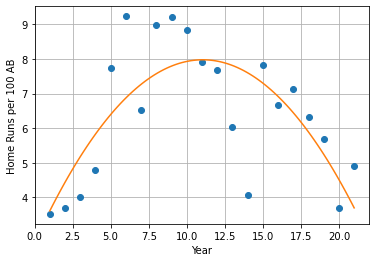

In [8]:
t = np.linspace(1, 21, num = 100)
HR_pred = 2.69 + 0.957*t - 0.0433*t**2

## Visualizing Ken Griffer Jr home run data
plt.plot('T', 'HR', 'o', data = ken)
plt.plot(t, HR_pred)
plt.xlabel('Year')
plt.ylabel('Home Runs per 100 AB')
plt.grid()
# plt.savefig('chapter6_plot4.pdf')
plt.show()

In [9]:
## Reading the csv file 
hockey = pd.read_csv('Dataset_6_5.csv')
hockey['PPG'] = hockey['P'] / hockey['GP']
hockey.head()

,Name,GP,P,TOI,PPG
0,Daniel Winnik,84,23,16.700000,0.273810
1,Cody Hodgson,83,41,13.816667,0.493976
2,Steven Stamkos,82,97,22.016667,1.182927
3,Ryan Getzlaf,82,57,21.600000,0.695122
4,Eric Staal,82,70,21.550000,0.853659


In [10]:
## Fitting linear model
hockey_md = smf.ols(formula = 'PPG ~ TOI', data = hockey).fit()

## Extracting model result
hockey_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPG   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     762.9
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           3.68e-84
Time:                        15:36:37   Log-Likelihood:                 167.58
No. Observations:                 300   AIC:                            -331.2
Df Residuals:                     298   BIC:                            -323.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5048      0.037    -13.503      0.000      -0.578      -0.431
TOI            0.0639      0.002     27.622      0.000       0.059       0.068
==============================================================================
Omnibus:                       10.106   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.745
Skew:                           0.370   Prob(JB):                      0.00464
Kurtosis:                       3.559   Cond. No.                         75.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

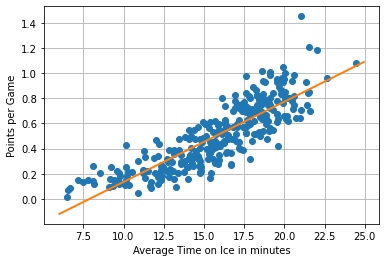

In [11]:
t = np.linspace(np.min(hockey['TOI'])-0.5, np.max(hockey['TOI'])+0.5, num = 100)
y = -0.5048 + 0.0639*t

plt.plot('TOI', 'PPG', 'o', data = hockey)
plt.plot(t, y, linewidth = 2)
plt.xlabel('Average Time on Ice in minutes')
plt.ylabel('Points per Game')
plt.grid()
# plt.savefig('chapter6_plot5.pdf')
plt.show()

In [12]:
## Fitting linear model
hockey_quadratic_md = smf.ols(formula = 'PPG ~ TOI + I(TOI**2)', data = hockey).fit()

## Extracting model result
hockey_quadratic_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PPG   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     430.6
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.72e-88
Time:                        15:36:37   Log-Likelihood:                 181.23
No. Observations:                 300   AIC:                            -356.5
Df Residuals:                     297   BIC:                            -345.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0905      0.118      0.770      0.442      -0.141       0.322
TOI            -0.0201      0.016     -1.262      0.208      -0.052       0.011
I(TOI ** 2)     0.0028      0.001      5.319      0.000       0.002       0.004
==============================================================================
Omnibus:                        7.404   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.352
Skew:                           0.326   Prob(JB):                       0.0253
Kurtosis:                       3.404   Cond. No.                     4.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

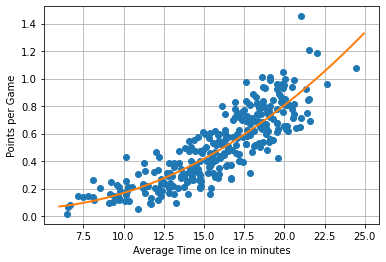

In [13]:
t = np.linspace(np.min(hockey['TOI'])-0.5, np.max(hockey['TOI'])+0.5, num = 100)
y = 0.0905 - 0.0202*t + 0.0028*t**2

plt.plot('TOI', 'PPG', 'o', data = hockey)
plt.plot(t, y, linewidth = 2)
plt.xlabel('Average Time on Ice in minutes')
plt.ylabel('Points per Game')
plt.grid()
# plt.savefig('chapter6_plot6.pdf')
plt.show()

In [14]:
hockey['ln_PPG'] = np.log(hockey['PPG'])
hockey.head()

,Name,GP,P,TOI,PPG,ln_PPG
0,Daniel Winnik,84,23,16.700000,0.273810,-1.295323
1,Cody Hodgson,83,41,13.816667,0.493976,-0.705269
2,Steven Stamkos,82,97,22.016667,1.182927,0.167992
3,Ryan Getzlaf,82,57,21.600000,0.695122,-0.363668
4,Eric Staal,82,70,21.550000,0.853659,-0.158224


In [15]:
## Fitting a linear model using log(PPG) as target
log_md = smf.ols(formula = 'ln_PPG ~ TOI', data = hockey).fit()

## Extracting model results
log_md.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_PPG   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     852.1
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           2.17e-89
Time:                        15:36:38   Log-Likelihood:                -92.065
No. Observations:                 300   AIC:                             188.1
Df Residuals:                     298   BIC:                             195.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3896      0.089    -38.157      0.000      -3.564      -3.215
TOI            0.1605      0.005     29.191      0.000       0.150       0.171
==============================================================================
Omnibus:                       66.825   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.896
Skew:                          -0.992   Prob(JB):                     1.30e-42
Kurtosis:                       6.391   Cond. No.                         75.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

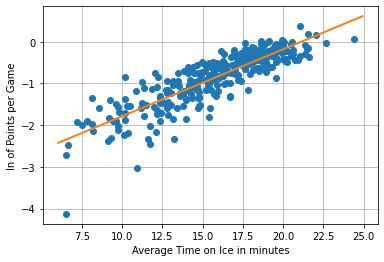

In [16]:
t = np.linspace(np.min(hockey['TOI'])-0.5, np.max(hockey['TOI'])+0.5, num = 100)
y = -3.3896 + 0.1605*t 

plt.plot('TOI', 'ln_PPG', 'o', data = hockey)
plt.plot(t, y, linewidth = 2)
plt.xlabel('Average Time on Ice in minutes')
plt.ylabel('ln of Points per Game')
plt.grid()
# plt.savefig('chapter6_plot7.pdf')
plt.show()

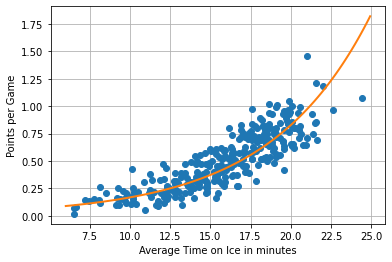

In [17]:
t = np.linspace(np.min(hockey['TOI'])-0.5, np.max(hockey['TOI'])+0.5, num = 100)
y = 0.0337*np.exp(0.160*t) 

plt.plot('TOI', 'PPG', 'o', data = hockey)
plt.plot(t, y, linewidth = 2)
plt.xlabel('Average Time on Ice in minutes')
plt.ylabel('Points per Game')
plt.grid()
# plt.savefig('chapter6_plot8.pdf')
plt.show()

# Regression with Categorical Predictor Variable

In [18]:
## Reading the csv file 
baseball = pd.read_csv('Dataset_7_1.csv')
baseball.columns = [x.strip(' ') for x in baseball.columns]
baseball.head()

,Name,R,LG,K,W,HR,WHIP
0,Verlander,3.7125,AL,10.0875,2.3625,0.7500,1.1750
1,Halladay,3.0879,AL,7.8326,1.3180,0.8285,1.1255
2,Hernandez,3.0545,AL,8.1830,2.6774,0.5656,1.1355
3,Wainwrigh,2.8970,NL,8.1888,2.5494,0.6567,1.2103
4,Lee,3.4187,NL,7.0317,1.6705,0.6604,1.2432


In [19]:
## Initial model 
md1 = smf.ols(formula = 'R ~ K + W', data = baseball).fit()

## Extracting model results
md1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     68.19
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           4.02e-26
Time:                        15:36:38   Log-Likelihood:                -592.76
No. Observations:                 393   AIC:                             1192.
Df Residuals:                     390   BIC:                             1203.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2383      0.268     19.561      0.000       4.712       5.765
K             -0.2953      0.031     -9.681      0.000      -0.355      -0.235
W              0.4008      0.051      7.894      0.000       0.301       0.501
==============================================================================
Omnibus:                       19.573   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.476
Skew:                           0.425   Prob(JB):                     2.94e-06
Kurtosis:                       3.912   Cond. No.                         40.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
## Changing label to 0-1
baseball['L'] = np.where(baseball['LG'] == 'AL', 1, 0)
baseball.head()

,Name,R,LG,K,W,HR,WHIP,L
0,Verlander,3.7125,AL,10.0875,2.3625,0.7500,1.1750,1
1,Halladay,3.0879,AL,7.8326,1.3180,0.8285,1.1255,1
2,Hernandez,3.0545,AL,8.1830,2.6774,0.5656,1.1355,1
3,Wainwrigh,2.8970,NL,8.1888,2.5494,0.6567,1.2103,0
4,Lee,3.4187,NL,7.0317,1.6705,0.6604,1.2432,0


In [21]:
## Building regression model 
md2 = smf.ols(formula = 'R ~ K + W + L', data = baseball).fit()

## Extracting model results
md2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           2.40e-27
Time:                        15:36:38   Log-Likelihood:                -587.62
No. Observations:                 393   AIC:                             1183.
Df Residuals:                     389   BIC:                             1199.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0130      0.274     18.310      0.000       4.475       5.551
K             -0.2918      0.030     -9.674      0.000      -0.351      -0.233
W              0.4110      0.050      8.175      0.000       0.312       0.510
L              0.3536      0.110      3.212      0.001       0.137       0.570
==============================================================================
Omnibus:                       19.030   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.944
Skew:                           0.447   Prob(JB):                     1.04e-05
Kurtosis:                       3.775   Cond. No.                         41.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
## Reading the csv file 
nba = pd.read_csv('Dataset_7_4.csv')

## Creating P_C and P_F
nba['P_C'] = np.where(nba['POS'] == 'C', 1, 0)
nba['P_F'] = np.where(nba['POS'] == 'F', 1, 0)
nba['P_G'] = np.where(nba['POS'] == 'G', 1, 0)

## Creating iterations 
nba['X_P_C'] = nba['ORPG'] * nba['P_C']
nba['X_P_F'] = nba['ORPG'] * nba['P_F']
nba.head()

,Player,PTS,ORPG,POS,P_C,P_F,P_G,X_P_C,X_P_F
0,Al Horford,15.3,2.4,C,1,0,0,2.4,0.0
1,Al Jefferson,18.6,2.9,C,1,0,0,2.9,0.0
2,Boris Diaw,11.3,1.3,C,1,0,0,1.3,0.0
3,Brendan Haywood,4.4,1.8,C,1,0,0,1.8,0.0
4,Brook Lopez,20.4,2.4,C,1,0,0,2.4,0.0


In [23]:
## Building the model 
nba_md1 = smf.ols(formula = 'PTS ~ ORPG', data = nba).fit()

## Extracting model results 
nba_md1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     10.84
Date:                Sun, 17 Oct 2021   Prob (F-statistic):            0.00119
Time:                        15:36:38   Log-Likelihood:                -572.48
No. Observations:                 185   AIC:                             1149.
Df Residuals:                     183   BIC:                             1155.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1846      0.655     15.545      0.000       8.892      11.477
ORPG           1.4172      0.430      3.292      0.001       0.568       2.266
==============================================================================
Omnibus:                       14.741   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.028
Skew:                           0.710   Prob(JB):                     0.000331
Kurtosis:                       3.252   Cond. No.                         3.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
## Building multiple regression model 
nba_md2 = smf.ols(formula = 'PTS ~ ORPG + P_C + P_F', data = nba).fit()

## Extracting model results
nba_md2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     11.88
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           3.89e-07
Time:                        15:36:38   Log-Likelihood:                -561.19
No. Observations:                 185   AIC:                             1130.
Df Residuals:                     181   BIC:                             1143.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5430      0.654     16.109      0.000       9.252      11.834
ORPG           2.9775      0.529      5.630      0.000       1.934       4.021
P_C           -6.5888      1.359     -4.848      0.000      -9.270      -3.907
P_F           -2.7260      0.955     -2.855      0.005      -4.610      -0.842
==============================================================================
Omnibus:                       22.436   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.761
Skew:                           0.848   Prob(JB):                     1.54e-06
Kurtosis:                       3.772   Cond. No.                         7.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
## Building multiple regression model 
nba_md2 = smf.ols(formula = 'PTS ~ ORPG + P_C + P_F + X_P_C + X_P_F', data = nba).fit()

## Extracting model results
nba_md2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     9.240
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           7.67e-08
Time:                        15:36:38   Log-Likelihood:                -556.57
No. Observations:                 185   AIC:                             1125.
Df Residuals:                     179   BIC:                             1144.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8519      1.171      6.705      0.000       5.541      10.163
ORPG           7.7559      1.815      4.273      0.000       4.174      11.338
P_C           -5.9904      3.006     -1.993      0.048     -11.922      -0.059
P_F            1.0970      1.580      0.694      0.488      -2.020       4.214
X_P_C         -3.7896      2.197     -1.725      0.086      -8.125       0.546
X_P_F         -5.5377      1.912     -2.896      0.004      -9.311      -1.764
==============================================================================
Omnibus:                       19.814   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.860
Skew:                           0.785   Prob(JB):                     1.09e-05
Kurtosis:                       3.708   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
## Building multiple regression model 
nba_md3 = smf.ols(formula = 'PTS ~ ORPG + P_C + P_G', data = nba).fit()

## Extracting model results
nba_md3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     11.88
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           3.89e-07
Time:                        15:36:38   Log-Likelihood:                -561.19
No. Observations:                 185   AIC:                             1130.
Df Residuals:                     181   BIC:                             1143.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8169      0.976      8.008      0.000       5.891       9.743
ORPG           2.9775      0.529      5.630      0.000       1.934       4.021
P_C           -3.8628      1.128     -3.424      0.001      -6.089      -1.637
P_G            2.7260      0.955      2.855      0.005       0.842       4.610
==============================================================================
Omnibus:                       22.436   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.761
Skew:                           0.848   Prob(JB):                     1.54e-06
Kurtosis:                       3.772   Cond. No.                         6.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
## Building multiple regression model 
nba_md4 = smf.ols(formula = 'PTS ~ ORPG + P_C + P_F', data = nba).fit()

## Extracting model results
nba_md4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     11.88
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           3.89e-07
Time:                        15:36:38   Log-Likelihood:                -561.19
No. Observations:                 185   AIC:                             1130.
Df Residuals:                     181   BIC:                             1143.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5430      0.654     16.109      0.000       9.252      11.834
ORPG           2.9775      0.529      5.630      0.000       1.934       4.021
P_C           -6.5888      1.359     -4.848      0.000      -9.270      -3.907
P_F           -2.7260      0.955     -2.855      0.005      -4.610      -0.842
==============================================================================
Omnibus:                       22.436   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.761
Skew:                           0.848   Prob(JB):                     1.54e-06
Kurtosis:                       3.772   Cond. No.                         7.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Identifying Factor Effect

In [28]:
## Reading the csv file
nba = pd.read_csv('Dataset_7_5.csv')

## Putting variables in the right format
nba['FG_PCT'] = 100*nba['FG_PCT']
nba['FT_PCT'] = 100*nba['FT_PCT']
nba.head()

,Team,Year,PPG,FG_PCT,FT_PCT,THR_PCT
0,Phoenix,2009,109.4,50.4,74.4,0.383
1,Golden State,2009,108.6,45.8,79.1,0.373
2,LA Lakers,2009,106.9,47.4,77.0,0.361
3,New York,2009,105.2,44.5,78.4,0.360
4,Indiana,2009,105.1,45.5,80.7,0.378


In [29]:
## Building regression model 
nba_md5 = smf.ols(formula = 'PPG ~ FG_PCT + FT_PCT', data = nba).fit()

## Extracting model results
nba_md5.summary(0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     29.68
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.49e-10
Time:                        15:36:38   Log-Likelihood:                -230.40
No. Observations:                  90   AIC:                             466.8
Df Residuals:                      87   BIC:                             474.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.1077     15.535     -0.908      0.366     -44.985      16.770
FG_PCT         1.7191      0.241      7.141      0.000       1.241       2.198
FT_PCT         0.4586      0.130      3.528      0.001       0.200       0.717
==============================================================================
Omnibus:                        0.352   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.519
Skew:                           0.101   Prob(JB):                        0.772
Kurtosis:                       2.688   Cond. No.                     4.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Factors Affecting Score of PGA Golfers

In [30]:
## Reading the csv file 
pga = pd.read_csv('Dataset_7_6.csv')
pga.head()

,Golfer,Dist,GinR,Putt,Scr,Avg
0,Aaron Baddeley,296.2,65.48,0.350,59.44,70.23
1,Adam Scott,299.7,68.08,-0.172,59.00,69.87
2,Alex Cejka,280.3,66.10,-0.684,56.94,71.18
3,Alex Prugh,298.6,65.95,-0.575,47.91,71.90
4,Alexandre Rocha,290.9,68.23,0.009,55.21,71.26


In [31]:
## Building the linear model 
pga_md = smf.ols(formula = 'Avg ~ Dist + GinR + Putt + Scr', data =  pga).fit()

## Extracting model results
pga_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Avg   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     103.4
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.13e-45
Time:                        15:41:44   Log-Likelihood:                -82.116
No. Observations:                 186   AIC:                             174.2
Df Residuals:                     181   BIC:                             190.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.8947      1.413     65.724      0.000      90.106      95.684
Dist          -0.0252      0.004     -6.839      0.000      -0.032      -0.018
GinR          -0.1340      0.012    -11.121      0.000      -0.158      -0.110
Putt          -0.6140      0.097     -6.319      0.000      -0.806      -0.422
Scr           -0.1023      0.011     -9.595      0.000      -0.123      -0.081
==============================================================================
Omnibus:                        0.469   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.540
Skew:                           0.117   Prob(JB):                        0.763
Kurtosis:                       2.877   Cond. No.                     1.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""